# Credit Default classification

In this notebook we use scikit-learn, a popular machine learning package in python to train and tune a classifier. In this notebook we will a classification technique (logistic regression) that is representative of methods and challenges encountered when using any classification method.


## Dataset 1
The dataset we will be using is default of credit card clients Data Set.


Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Loading training data set
uploaded = files.upload()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv
Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
# Spliting training data into X and y
df = pd.read_csv('CreditDefault_training.csv')
X = df.loc[:, df.columns!='default.payment.next.month']
y = df['default.payment.next.month']

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
# Load test data set
dft = pd.read_csv('CreditDefault_Xtest.csv')

In [ ]:
#standardization and one-hot encoding
from sklearn.preprocessing import StandardScaler
X_full = pd.concat([X, dft], axis=0)

# Standardization
scaler = StandardScaler()
X_numeric = scaler.fit_transform(
    X_full.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']))


In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc= OneHotEncoder(sparse=False)

col_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X_onhot_cols = enc.fit_transform(X_full[col_categorical])

# Display purpose
X_onhot_df = pd.DataFrame(X_onhot_cols, columns=enc.get_feature_names_out(col_categorical))
X_onhot_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concat numeric and one-hot encoded columns
X_full_transform = np.concatenate([X_numeric, X_onhot_cols], axis=1)

# Split back into training and test set of X's
X = X_full_transform[:-dft.shape[0],:]
X_test = X_full_transform[-dft.shape[0]:,:]

# Check number of rows
print(X.shape)
print(X_test.shape)

(3985, 82)
(1000, 82)


**Splitting training data into training and validation set (70:30 ratio) **

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(2789, 82)
(2789,)
(1196, 82)


## Logistic Regression


Using LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels


classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset

y_train_pred = classifier.predict(X_val)

Implementing my_precision(), my_recall(), my_accuracy() to calculate said metrics

In [ ]:
def my_precision(y, y_preds): #TP/(TP+FP)

    # Initialize variables
    tp = 0
    fp = 0

    # Compute TP and FP
    for i in range(len(y)):
      if y_preds[i] == 1:
        if y[i] == 1:
          tp += 1
        else:
          fp += 1

    return(tp/(tp+fp))

def my_recall(y, y_preds): #TP/(TP+FN)

    # Initialize variables
    tp = 0
    fn = 0

    # Compute TP and FN
    for i in range(len(y)):
      if y[i] == 1:
        if y_preds[i] == 1:
          tp += 1
        else:
          fn += 1

    return(tp/(tp+fn))

def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)

    # Initialize variables
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    # Compute TP, FP, TN, FN
    for i in range(len(y)):
      if y[i] == 1:
        if y_preds[i] == 1:
          tp += 1
        else:
          fn += 1
      elif y[i] == 0:
        if y_preds[i] == 1:
          fp += 1
        else:
          tn += 1

    return((tp+tn)/(tp+fp+fn+tn))

Using the above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:


print(f'Precision: {my_precision(y_val.to_numpy(), y_train_pred)}')
print(f'Recall: {my_recall(y_val.to_numpy(), y_train_pred)}')
print(f'Accuracy: {my_accuracy(y_val.to_numpy(), y_train_pred)}')

Precision: 0.6610169491525424
Recall: 0.43333333333333335
Accuracy: 0.8219063545150501


Accuracy<br>
0.8219063545150501

Precision<br>
0.6610169491525424

Recall<br>
0.43333333333333335


### ROC curve

Using roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Using validation set to make predictions and to draw ROC curve.

AUC: 0.6842692584593233


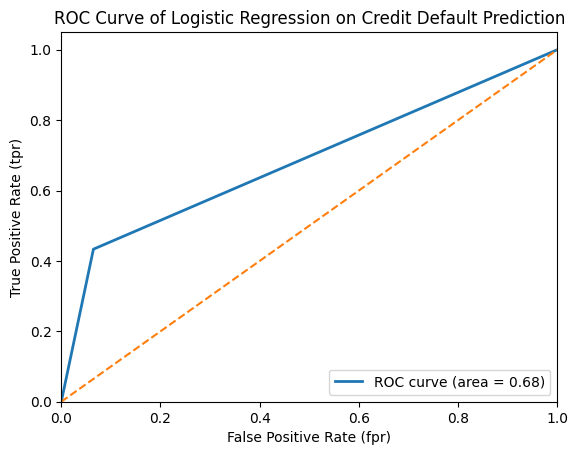

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

# compute roc curve and auc
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_train_pred)
auc_val = metrics.auc(fpr, tpr)
print(f'AUC: {metrics.auc(fpr, tpr)}')

# plot the ROC
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % auc_val)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],linestyle = '--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('ROC Curve of Logistic Regression on Credit Default Prediction')
plt.ylabel('True Positive Rate (tpr)')
plt.xlabel('False Positive Rate (fpr)')
plt.show()


## Hyperparameters and model tuning

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


First, building a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Making predictions on validation set and compute accuracy, precision and recall.

In [ ]:

from sklearn.linear_model import LogisticRegression

# initialize the model
classifier = LogisticRegression(C = 0.1, penalty = 'l1', solver='liblinear')
classifier.fit(X_train, y_train)

# make prediction
y_train_pred = classifier.predict(X_val)

# compute metrics
print(f'Precision: {my_precision(y_val.to_numpy(), y_train_pred)}')
print(f'Recall: {my_recall(y_val.to_numpy(), y_train_pred)}')
print(f'Accuracy: {my_accuracy(y_val.to_numpy(), y_train_pred)}')

Precision: 0.6823529411764706
Recall: 0.42962962962962964
Accuracy: 0.8260869565217391


Next, building a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Making predictions on validation set and compute accuracy, precision and recall.

In [ ]:

# initialize the model
classifier = LogisticRegression(C = 0.5, penalty = 'l1', solver='liblinear')
classifier.fit(X_train, y_train)

# make prediction
y_train_pred = classifier.predict(X_val)

# compute metrics
print(f'Precision: {my_precision(y_val.to_numpy(), y_train_pred)}')
print(f'Recall: {my_recall(y_val.to_numpy(), y_train_pred)}')
print(f'Accuracy: {my_accuracy(y_val.to_numpy(), y_train_pred)}')

Precision: 0.6685714285714286
Recall: 0.43333333333333335
Accuracy: 0.8235785953177257


Building a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Making predictions on validation set and compute accuracy, precision and recall.

In [ ]:

# initialize the model
classifier = LogisticRegression(C = 0.1, penalty = 'l2', solver='liblinear')
classifier.fit(X_train, y_train)

# make prediction
y_train_pred = classifier.predict(X_val)

# compute metrics
print(f'Precision: {my_precision(y_val.to_numpy(), y_train_pred)}')
print(f'Recall: {my_recall(y_val.to_numpy(), y_train_pred)}')
print(f'Accuracy: {my_accuracy(y_val.to_numpy(), y_train_pred)}')

Precision: 0.6627906976744186
Recall: 0.4222222222222222
Accuracy: 0.8210702341137124


Building a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Making predictions on validation set and compute accuracy, precision and recall. 

In [ ]:

# initialize the model
classifier = LogisticRegression(C = 0.5, penalty = 'l2', solver='liblinear')
classifier.fit(X_train, y_train)

# make prediction
y_train_pred = classifier.predict(X_val)

# compute metrics
print(f'Precision: {my_precision(y_val.to_numpy(), y_train_pred)}')
print(f'Recall: {my_recall(y_val.to_numpy(), y_train_pred)}')
print(f'Accuracy: {my_accuracy(y_val.to_numpy(), y_train_pred)}')

Precision: 0.6666666666666666
Recall: 0.43703703703703706
Accuracy: 0.8235785953177257


To summarise, the last model with C = 0.5 and l2 penalty has the best performance. For evaluation, recall would be the most appropriate metric for this case to prevent high cost of false negatives. Since the last model has the highest recall and moderately high precision and accuracy, we choose to use this parameter combination as our final model.

# Test set

Choosing the best settings and hyperparameters to run the test set.

In [ ]:
# initialize the model
classifier = LogisticRegression(C = 0.5, penalty = 'l2', solver='liblinear')
classifier.fit(X_train, y_train)

# return the prediction as "y_pred"
y_pred = classifier.predict(X_test)